In [1]:
import torch, torchvision
from torch import nn, optim
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt
import copy

In [2]:
numb_batch = 64

In [4]:
T = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])
train_data = torchvision.datasets.MNIST('mnist_data', train=True, download=True, transform=T)
test_data = torchvision.datasets.MNIST('mnist_data', train=False, download=True, transform=T)

train_dl = torch.utils.data.DataLoader(train_data, batch_size=numb_batch)
test_dl = torch.utils.data.DataLoader(test_data, batch_size=numb_batch)

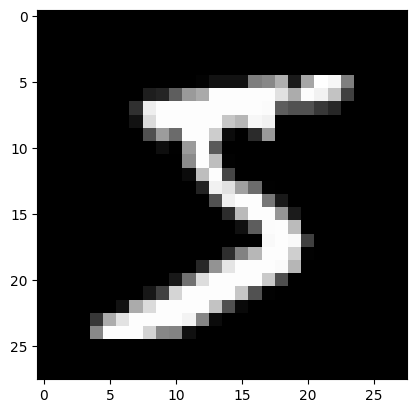

In [5]:
plt.imshow(train_data[0][0][0], cmap='gray')

In [6]:
def create_lenet():
    model = nn.Sequential(
        nn.Conv2d(1, 6, 5, padding=2),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),

        nn.Conv2d(6, 16, 5, padding=0),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),

        nn.Flatten(),
        nn.Linear(400, 120),
        nn.Linear(120, 84),
        nn.Linear(84, 10),
    )
    return model

In [7]:
def validate(model, data):
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(data):
        images = images.cuda()
        x = model(images)
        value, pred = torch.max(x, 1)
        pred = pred.data.cpu()
        total += x.size(0)
        correct += torch.sum(pred == labels)

    return correct*100.0/total

In [31]:
def train(numb_epoch=3, lr=1e-3, device='cpu'):
    accuracies = []
    cnn = create_lenet().to(device)
    cec= nn.CrossEntropyLoss()
    optimiser = optim.Adam(cnn.parameters(), lr=lr)
    max_accuracy = 0

    for epoch in range(numb_epoch):
        for i, (images, labels) in enumerate(train_dl):
            images = images.to(device)
            labels = labels.to(device)
            optimiser.zero_grad()
            pred = cnn(images)
            loss = cec(pred, labels)
            loss.backward()
            optimiser.step()
        accuracy = float(validate(cnn, test_dl))
        accuracies.append(accuracy)
        if accuracy > max_accuracy:
            best_model = copy.deepcopy(cnn)
            max_accuracy = accuracy
            print('Saving Best Model with Accuracy: ', accuracy)
        print('Epoch: ', epoch+1, 'Accuracy: ', accuracy)
    plt.plot(accuracies)
    plt.grid()
    plt.title('Accuracy as a function of epoch number')
    plt.xlabel('Epoch Number')
    plt.ylabel('Accuracy (%)')
    return best_model

In [32]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [33]:
device

device(type='cuda', index=0)

Saving Best Model with Accuracy:  96.7699966430664
Epoch:  1 Accuracy:  96.7699966430664
Saving Best Model with Accuracy:  97.63999938964844
Epoch:  2 Accuracy:  97.63999938964844
Saving Best Model with Accuracy:  98.20999908447266
Epoch:  3 Accuracy:  98.20999908447266
Saving Best Model with Accuracy:  98.63999938964844
Epoch:  4 Accuracy:  98.63999938964844
Saving Best Model with Accuracy:  98.66000366210938
Epoch:  5 Accuracy:  98.66000366210938
Saving Best Model with Accuracy:  98.7699966430664
Epoch:  6 Accuracy:  98.7699966430664
Saving Best Model with Accuracy:  98.80000305175781
Epoch:  7 Accuracy:  98.80000305175781
Epoch:  8 Accuracy:  98.69999694824219
Epoch:  9 Accuracy:  98.48999786376953
Epoch:  10 Accuracy:  98.48999786376953
Epoch:  11 Accuracy:  98.56999969482422
Epoch:  12 Accuracy:  98.61000061035156
Epoch:  13 Accuracy:  98.51000213623047
Epoch:  14 Accuracy:  98.27999877929688
Epoch:  15 Accuracy:  98.58999633789062
Epoch:  16 Accuracy:  98.27999877929688
Epoch:  1

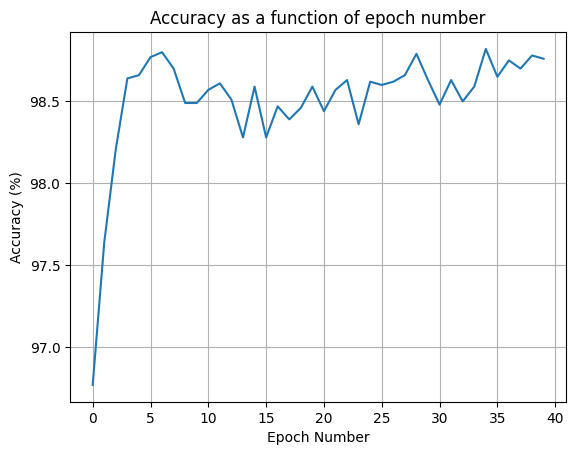

In [34]:
lenet = train(40, device=device)